In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


step-1:import our dataset using pandas

In [7]:
data=pd.read_csv('/content/Obesity Classification.csv')
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


step-2: check the shape and information of dataset

In [9]:
data.shape

(108, 7)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


step-3:CHECKING THE COLUMNS


In [13]:
data.columns

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

stpe-4:now to drop the unique columns like(id,name..) if you give axis=1 means we delete the entire column

In [ ]:
data=data.drop(columns=['ID'],axis=1)
data.head()

step-5: check the null values and if it have then chaeck the sum of null values

In [22]:
data.isnull().any()

Age       False
Gender    False
Height    False
Weight    False
BMI       False
Label     False
dtype: bool

In [24]:
data.isnull().sum()

Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

if the dataset have null values we do this

i) if the null value occur at integer we replace MEAN(if the data grph is balanced we use this ) OR MEDIAN(proity)
ii) if the null value occur at object or category means we replace with mode(more occurenace feature)

syntax to replace = data['AGE'].fillna(data.AGE.median(),inplace=True)

In [27]:
data.fillna({ 'Age':data['Age'].median(),
             'Gender':data['Gender'].mode()},inplace=True)

after the replacing
step-6:
now we check descriptive statistic to our data here it will not giving the category column

In [28]:
data.describe()

,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000
mean,46.555556,166.574074,59.490741,20.549074
std,24.720620,27.873615,28.856233,7.583818
min,11.000000,120.000000,10.000000,3.900000
25%,27.000000,140.000000,35.000000,16.700000
50%,42.500000,175.000000,55.000000,21.200000
75%,59.250000,190.000000,85.000000,26.100000
max,112.000000,210.000000,120.000000,37.200000


In [29]:
data.Age.median()

42.5

In [30]:
data.Age.mean()

46.55555555555556

NOW TO FIND THE CORRELATION
SYNTAX=data.corr

In [31]:
data.corr()

<ipython-input-31-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Height,Weight,BMI
Age,1.000000,-0.076896,0.465106,0.474185
Height,-0.076896,1.000000,0.428890,0.354340
Weight,0.465106,0.428890,1.000000,0.972829
BMI,0.474185,0.354340,0.972829,1.000000


if we want to get the correlation in graph we use heatmap()

In [32]:
data.Label.value_counts()

Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64

In [33]:
data.Age.value_counts()

25    2
22    2
52    2
47    2
42    2
     ..
59    1
62    1
67    1
72    1
11    1
Name: Age, Length: 75, dtype: int64

now we do the visualization
here there three types of visualization
i)univariante analysis
ii) bivariant analysis
iii) trivarient analysis

UNIVARIANT ANALYSIS

<ipython-input-36-731b6eb60ab0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Age)


<Axes: xlabel='Age', ylabel='Density'>

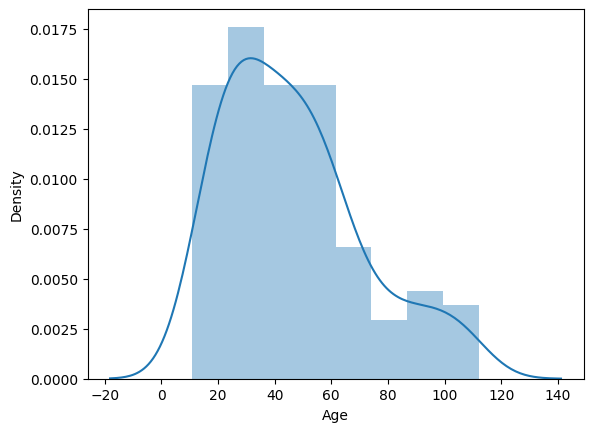

In [36]:
sns.distplot(data.Age)

in above the graph is right skew

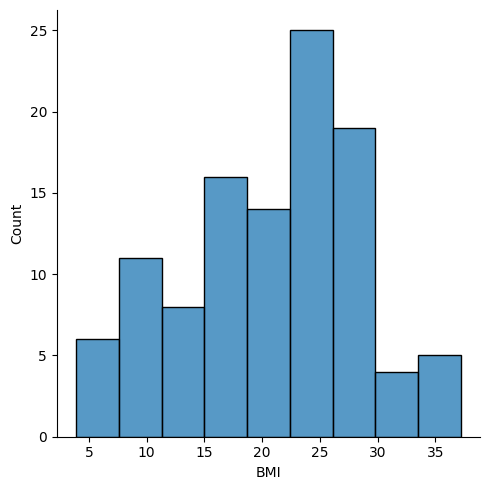

In [38]:
sns.displot(data.BMI)

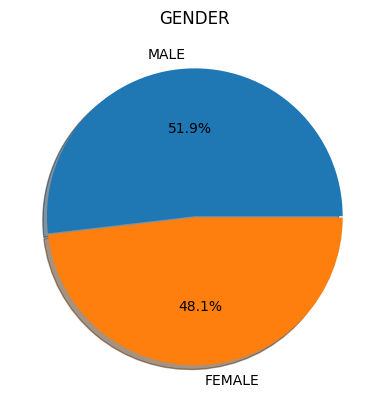

In [52]:
plt.pie(data.Gender.value_counts(),[0,000.009],autopct="%1.1f%%",labels=['MALE','FEMALE'],shadow=True)
plt.title("GENDER")
plt.show()

In [51]:
data.Gender.value_counts()

Male      56
Female    52
Name: Gender, dtype: int64

BIVARIENT ANALYSIS

<Axes: xlabel='Height', ylabel='BMI'>

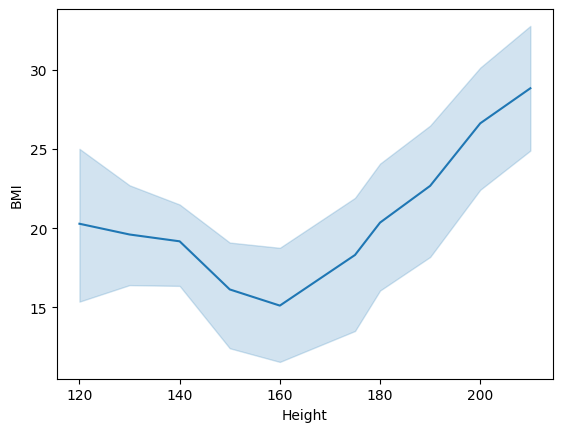

In [61]:
sns.lineplot(x=data.Height,y=data.BMI)

Text(0.5, 1.0, 'LABELS by GENDER')

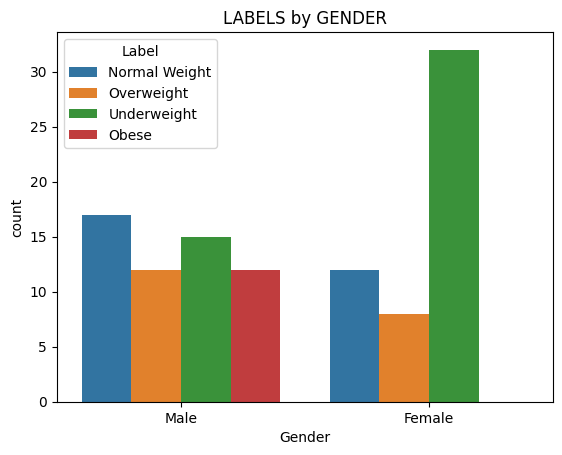

In [65]:
sns.countplot(data=data,x='Gender',hue='Label')
plt.title('LABELS by GENDER')

MULTIVARIANT ANALYSIS

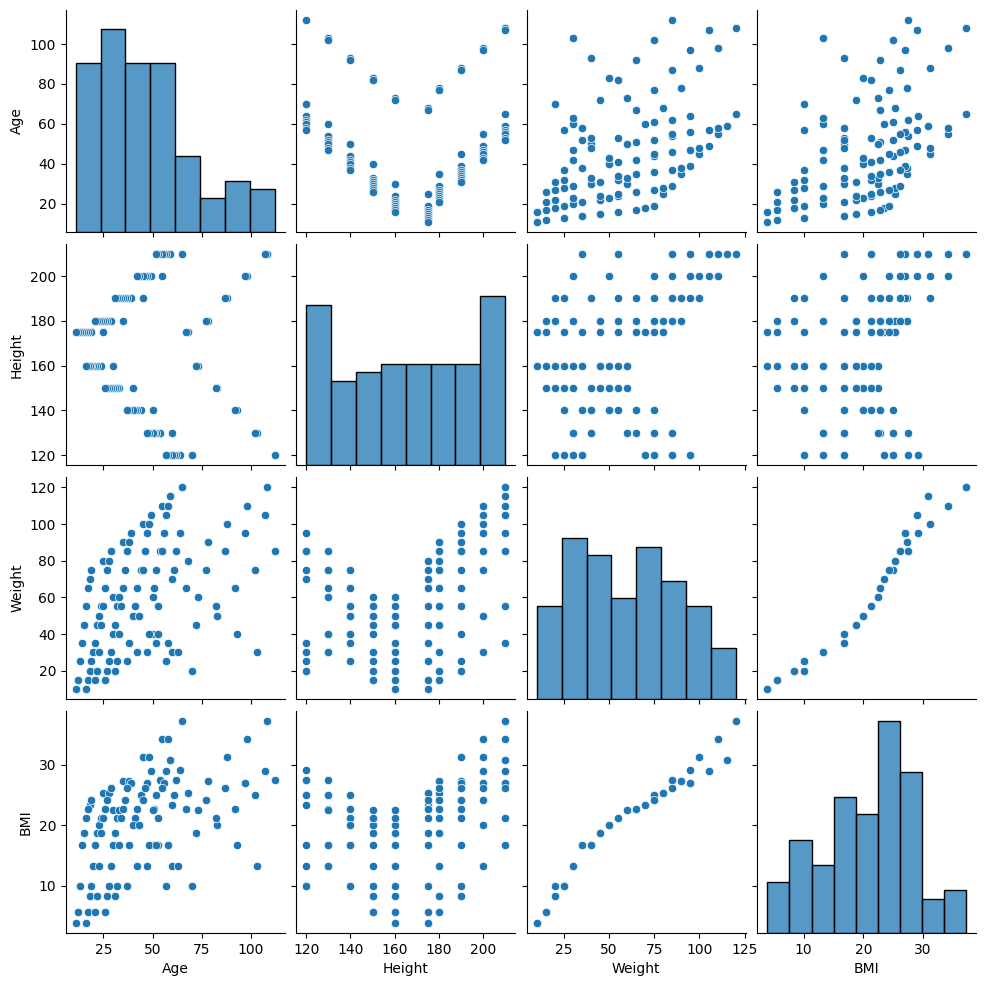

In [66]:
sns.pairplot(data)

here we use the correlation in visualzalisation if not give 'annot'=true it will not give the values in square box

<ipython-input-70-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

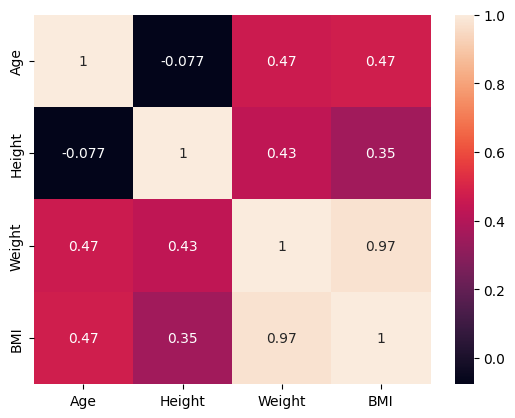

In [70]:
sns.heatmap(data.corr(),annot=True)

in above heatmap 0.97 if multipli correlation occur or is highly correlation  not with target column so we remove the row or column (weight or BMI)

OUTLIER DETECTION
1)revome method
2)replace method

REPLACE_METHOD

now to check is any outliers occur or not

<Axes: ylabel='Age'>

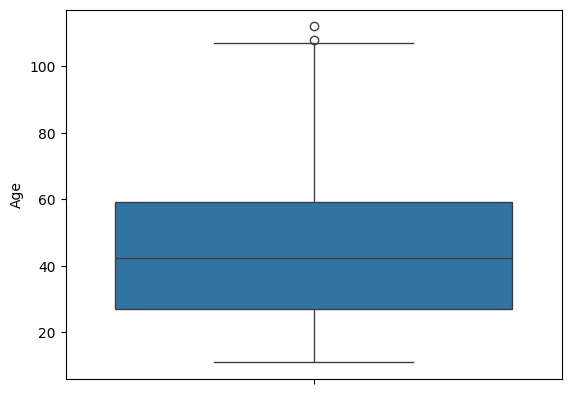

In [71]:
sns.boxplot(data.Age)

if the outerlier occur then we following process


first we find quantile 1 and 2

In [73]:
q1=data.Age.quantile(0.25)
q1

27.0

In [76]:
q3=data.Age.quantile(0.75)
q3

59.25

after the find q1,q1 we find IQR(inter qutail range)
iqr=q3-q1

In [77]:
iqr=q3-q1
iqr

32.25

after that we find upperlimit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

In [78]:
upperlimit=q3+1.5*iqr
upperlimit

107.625

now we replace the upperlimit to the

In [79]:
data['Age']=np.where(data.Age>upperlimit,data.Age.median(),data['Age'])

<Axes: ylabel='Age'>

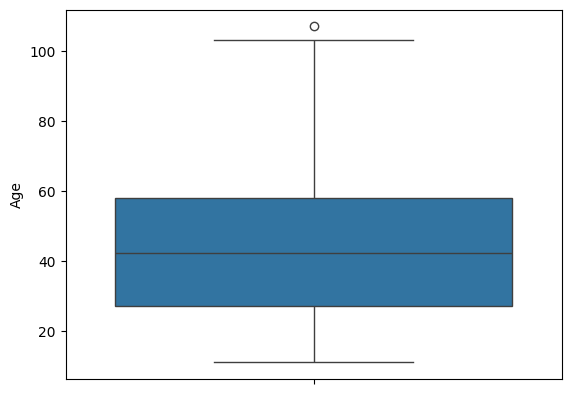

In [80]:
sns.boxplot(data.Age)

ENCODING TECHNIQUES

In [82]:
data.head()

,Age,Gender,Height,Weight,BMI,Label
0,25.0,Male,175,80,25.3,Normal Weight
1,30.0,Female,160,60,22.5,Normal Weight
2,35.0,Male,180,90,27.3,Overweight
3,40.0,Female,150,50,20.0,Underweight
4,45.0,Male,190,100,31.2,Obese


NOW WE GET INFORMATION WHEN USING DESCRIBE THE DATAFRAME



1)LABEL ENCODING METHOD
2)ONE HOT ENCODING

*****label encoding

In [84]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [88]:
data.Gender=le.fit_transform(data.Gender) # here it will encode the text to digit ex:female=0,male=1

In [89]:
data.head()

,Age,Gender,Height,Weight,BMI,Label
0,25.0,1,175,80,25.3,Normal Weight
1,30.0,0,160,60,22.5,Normal Weight
2,35.0,1,180,90,27.3,Overweight
3,40.0,0,150,50,20.0,Underweight
4,45.0,1,190,100,31.2,Obese


one hot encoding method

it like label encod but here it split the colums to more colums

In [91]:
data1=pd.get_dummies(data,columns=['Label'])
data1.head()

,Age,Gender,Height,Weight,BMI,Label_Normal Weight,Label_Obese,Label_Overweight,Label_Underweight
0,25.0,1,175,80,25.3,1,0,0,0
1,30.0,0,160,60,22.5,1,0,0,0
2,35.0,1,180,90,27.3,0,0,1,0
3,40.0,0,150,50,20.0,0,0,0,1
4,45.0,1,190,100,31.2,0,1,0,0


In [93]:
data.Label=le.fit_transform(data.Label)
data.head()

,Age,Gender,Height,Weight,BMI,Label
0,25.0,1,175,80,25.3,0
1,30.0,0,160,60,22.5,0
2,35.0,1,180,90,27.3,2
3,40.0,0,150,50,20.0,3
4,45.0,1,190,100,31.2,1


In [94]:
data.corr()

,Age,Gender,Height,Weight,BMI,Label
Age,1.000000,-0.094708,-0.076528,0.416953,0.423134,-0.131920
Gender,-0.094708,1.000000,0.876225,0.418415,0.342342,-0.281647
Height,-0.076528,0.876225,1.000000,0.428890,0.354340,-0.237683
Weight,0.416953,0.418415,0.428890,1.000000,0.972829,-0.565555
BMI,0.423134,0.342342,0.354340,0.972829,1.000000,-0.589237
Label,-0.131920,-0.281647,-0.237683,-0.565555,-0.589237,1.000000


spliting data into independing and depending variables

In [97]:
x=data.iloc[:,:-1] # here x is independing variables
x.head()

,Age,Gender,Height,Weight,BMI
0,25.0,1,175,80,25.3
1,30.0,0,160,60,22.5
2,35.0,1,180,90,27.3
3,40.0,0,150,50,20.0
4,45.0,1,190,100,31.2


In [100]:
#y=data.iloc[:,-1] => # here y is depending variables(y is dependiing on x)
y=data.Label
y.head()

0    0
1    0
2    2
3    3
4    1
Name: Label, dtype: int64

after spliting the variables now we do scale our data it means we will change magnitude our values we have two types minmax and standing scaling

logsticregration

SCALING WITH INDEPENDING VARIBLES minmax_scaling

In [103]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

here if you give columns=x.columns means it gives the original column names and if will not give the dataframe the result will be comes in array formate

In [107]:
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head()

,Age,Gender,Height,Weight,BMI
0,0.145833,1.0,0.611111,0.636364,0.642643
1,0.197917,0.0,0.444444,0.454545,0.558559
2,0.250000,1.0,0.666667,0.727273,0.702703
3,0.302083,0.0,0.333333,0.363636,0.483483
4,0.354167,1.0,0.777778,0.818182,0.819820


in above output the values will not change just magnitude of the features will change

In [109]:
data.shape

(108, 6)

 train test split

random_state means it will take the 0 state values intilially it shuffle so in that case we use to take the 0 state values

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_scaled,y,test_size=00.3,random_state=0)

In [113]:
X_train.head()

,Age,Gender,Height,Weight,BMI
94,0.062500,0.0,0.444444,0.045455,0.051051
101,0.427083,1.0,1.000000,0.227273,0.384384
59,0.104167,0.0,0.444444,0.227273,0.384384
27,0.958333,0.0,0.111111,0.181818,0.282282
18,0.489583,1.0,1.000000,0.909091,0.909910
